In [1]:
from chinese_whispers import __version__ as cw_version
from networkx import __version__ as nx_version
print('Chinese Whispers {0}'.format(cw_version))
print('NetworkX {0}'.format(nx_version))

Chinese Whispers 0.4
NetworkX 2.1


# An Example of Simple Clustering

In [2]:
import networkx as nx
from chinese_whispers import chinese_whispers, aggregate_clusters

In [3]:
# Create a NetworkX graph G with two clusters
offset = 100
G = nx.karate_club_graph()
H = nx.karate_club_graph()
G.add_nodes_from([n + offset for n in H.nodes])
G.add_edges_from([(src + offset, dst + offset) for src, dst in H.edges])

In [4]:
# Perform clustering of G
chinese_whispers(G, weighting='top', seed=1337) # the seed parameter can be omitted

# Print the clusters in the descending order of size
print('Cluster ID\tCluster Elements\n')
for label, cluster in sorted(aggregate_clusters(G).items(), key=lambda e: len(e[1]), reverse=True):
    print('{}\t{}\n'.format(label, cluster))

Cluster ID	Cluster Elements

1	{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}

35	{128, 129, 130, 131, 132, 133, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127}



# Clustering and Visualizing with NetworkX

In [5]:
import matplotlib.pyplot as plt

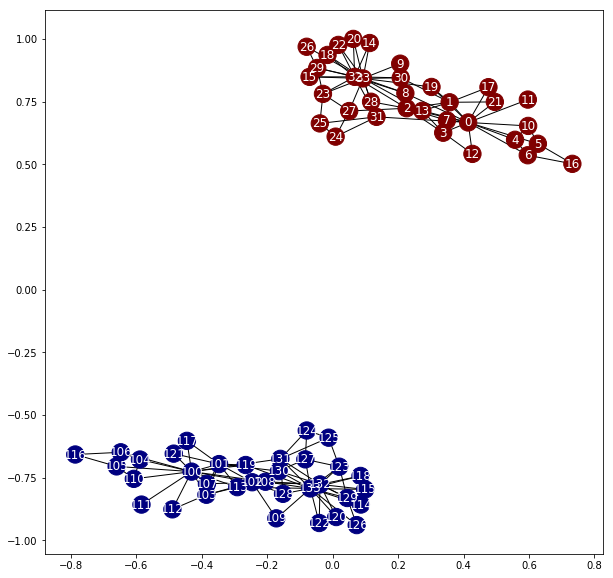

In [6]:
# Visualize the clustering of G using NetworkX (requires matplotlib)
colors = [1. / G.node[node]['label'] for node in G.nodes()]

fig = plt.gcf()
fig.set_size_inches(10, 10)

nx.draw_networkx(G, cmap=plt.get_cmap('jet'), node_color=colors, font_color='white')

plt.show()